In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv


In [2]:
df = pd.read_csv('/kaggle/input/bengaluru-house-price-data/Bengaluru_House_Data.csv')
df

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


In [3]:
df.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [5]:
print(df.describe())
print(df.shape)

               bath       balcony         price
count  13247.000000  12711.000000  13320.000000
mean       2.692610      1.584376    112.565627
std        1.341458      0.817263    148.971674
min        1.000000      0.000000      8.000000
25%        2.000000      1.000000     50.000000
50%        2.000000      2.000000     72.000000
75%        3.000000      2.000000    120.000000
max       40.000000      3.000000   3600.000000
(13320, 9)


In [6]:
df.isnull().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

In [7]:
df.shape

(13320, 9)

In [8]:
# we are having location, size, total_sqft, bathrooms and bolcony columns to predict price
# so we drop other columns.
df.drop(columns = (['area_type','availability','society','balcony']), axis=1, inplace=True)
df.head(4)

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00


In [9]:
df.rename(columns={'size':'BHK'}, inplace=True)
df.head(3)

,location,BHK,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00


In [10]:
# removing bedroom and BHK str in BHK column and keeping only numbers
df.BHK = df.BHK.str.split(' ').str[0]
df.head(5)

,location,BHK,total_sqft,bath,price
0,Electronic City Phase II,2,1056,2.0,39.07
1,Chikka Tirupathi,4,2600,5.0,120.00
2,Uttarahalli,3,1440,2.0,62.00
3,Lingadheeranahalli,3,1521,3.0,95.00
4,Kothanur,2,1200,2.0,51.00


In [11]:
df.dtypes

location       object
BHK            object
total_sqft     object
bath          float64
price         float64
dtype: object

In [12]:
df.isnull().sum()

location       1
BHK           16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
df.shape

(13320, 5)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   BHK         13304 non-null  object 
 2   total_sqft  13320 non-null  object 
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(2), object(3)
memory usage: 520.4+ KB


In [15]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
df['total_sqft'] = df['total_sqft'].apply(convert_sqft_to_num)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13319 non-null  object 
 1   BHK         13304 non-null  object 
 2   total_sqft  13274 non-null  float64
 3   bath        13247 non-null  float64
 4   price       13320 non-null  float64
dtypes: float64(3), object(2)
memory usage: 520.4+ KB


In [16]:
df.isnull().sum()

location       1
BHK           16
total_sqft    46
bath          73
price          0
dtype: int64

In [17]:
# fill null values :

df.BHK.fillna(4, inplace=True)
df.total_sqft.fillna(df.total_sqft.mode()[0], inplace=True)
df.isnull().sum()

location       1
BHK            0
total_sqft     0
bath          73
price          0
dtype: int64

In [18]:
df.dropna(inplace=True)
df.isnull().sum()

location      0
BHK           0
total_sqft    0
bath          0
price         0
dtype: int64

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   BHK         13246 non-null  object 
 2   total_sqft  13246 non-null  float64
 3   bath        13246 non-null  float64
 4   price       13246 non-null  float64
dtypes: float64(3), object(2)
memory usage: 620.9+ KB


In [20]:
df.BHK = df.BHK.astype('int')
df.bath = df.bath.astype('int')

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    13246 non-null  object 
 1   BHK         13246 non-null  int64  
 2   total_sqft  13246 non-null  float64
 3   bath        13246 non-null  int64  
 4   price       13246 non-null  float64
dtypes: float64(2), int64(2), object(1)
memory usage: 620.9+ KB


In [22]:
df.head(4)

,location,BHK,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2,39.07
1,Chikka Tirupathi,4,2600.0,5,120.00
2,Uttarahalli,3,1440.0,2,62.00
3,Lingadheeranahalli,3,1521.0,3,95.00


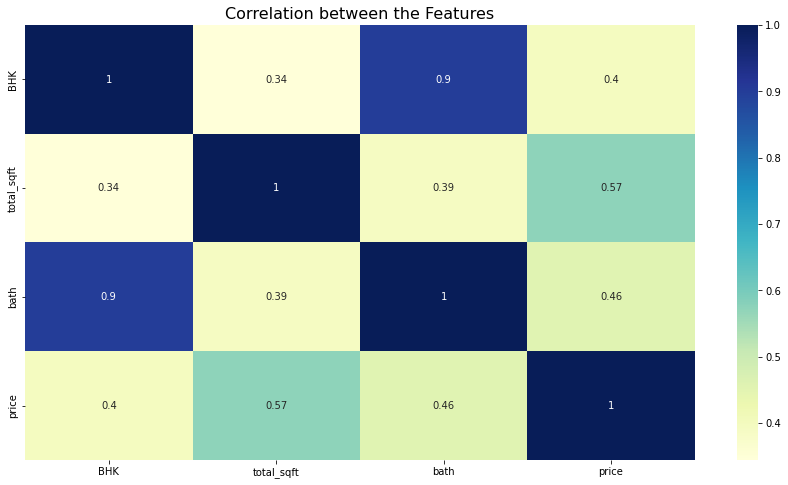

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu' )
plt.title('Correlation between the Features', size = 16)
plt.show()

The Correlation matrix shows the relationship with the attributes present in the dataset.

'total_sqft' and 'price' attribute shows a positive relation and

'bath' and 'bhk' shows high positive relationship with them

Our ultimate goal is to make price predictions, so there is a price column, but it holds the cost of the property in lakhs, so we are adding a new column called 'price per sqft' to understand the price of the house per square feet.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [25]:
df.location.head()

0    Electronic City Phase II
1            Chikka Tirupathi
2                 Uttarahalli
3          Lingadheeranahalli
4                    Kothanur
Name: location, dtype: object

remove xtra spaces in location feature

In [26]:
df['location'] = df['location'].apply(lambda x:x.strip())
df.head()

,location,BHK,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2,39.07
1,Chikka Tirupathi,4,2600.0,5,120.00
2,Uttarahalli,3,1440.0,2,62.00
3,Lingadheeranahalli,3,1521.0,3,95.00
4,Kothanur,2,1200.0,2,51.00


In [27]:
sort = df['location'].value_counts(ascending = False)
sort.values.sum()

13246

we will reduce the values by naming less than 15 location as 'others'

In [28]:
other_locations = sort[sort <= 16]
len(other_locations)

1125

In [29]:
df.location = df.location.apply(lambda i : 
                                'others' if i in other_locations 
                               else i)
df.sample(6)

,location,BHK,total_sqft,bath,price
13016,Kammasandra,3,1616.0,3,40.0
7560,Doddathoguru,2,1105.0,2,50.0
12787,others,3,1340.0,2,47.0
5605,others,2,1184.0,2,69.0
3109,Haralur Road,4,3400.0,5,240.0
9431,others,3,1560.0,2,125.0


In [30]:
len(df.location.unique()) , df.shape

(169, (13246, 5))

#### Real estate experts say that a master bedroom averages 300 square meters, while the other bedrooms average 210 square meters each.
#### Let's drop the ones with a square ft per bedroom 300 ((300+210)/2) and below:

In [31]:
dff = df[~(df.total_sqft/df.BHK < 300)]
dff.shape

(12494, 5)

In [32]:
dff.head()

,location,BHK,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2,39.07
1,Chikka Tirupathi,4,2600.0,5,120.00
2,Uttarahalli,3,1440.0,2,62.00
3,Lingadheeranahalli,3,1521.0,3,95.00
4,Kothanur,2,1200.0,2,51.00


Assume a flat is of 4bhk and available bathroom is 7 where the bathroom counts exceeds the total bedroom count and so we can neglect that data

In [33]:
dff[dff.bath < dff.BHK].shape

(1961, 5)

In [34]:
dff = dff[dff.bath < dff.BHK + 2]
dff.head(5)

,location,BHK,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2,39.07
1,Chikka Tirupathi,4,2600.0,5,120.00
2,Uttarahalli,3,1440.0,2,62.00
3,Lingadheeranahalli,3,1521.0,3,95.00
4,Kothanur,2,1200.0,2,51.00


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

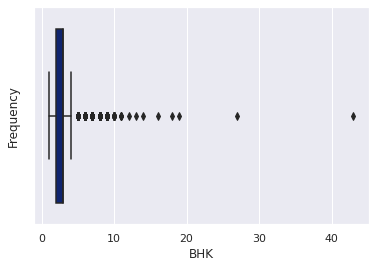

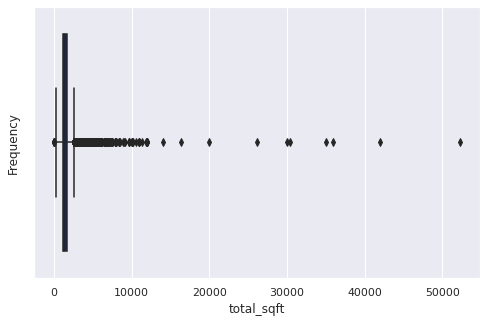

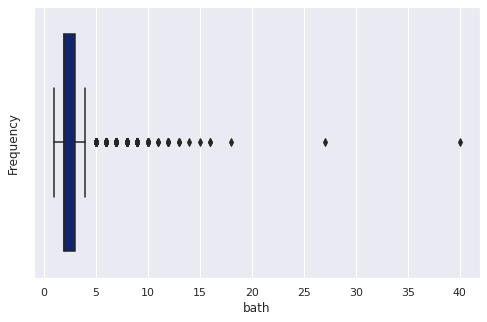

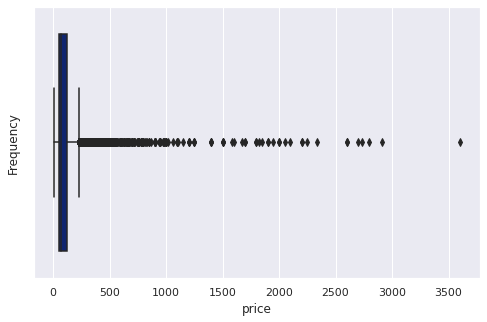

In [35]:
Numerical=df.select_dtypes(exclude='object').columns.tolist()

import seaborn as sns

for i in Numerical:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], palette='dark');

In [36]:
# removing outliers with the help of IQR
q1 = dff.quantile(0.35)
q3 = dff.quantile(0.65)
iqr = q3-q1 #Interquartile range
upper_limit  = q1 - 1.5 * iqr
lower_limit = q3 + 1.5 * iqr
df1 = dff[~((dff < upper_limit) 
                         | (dff > lower_limit)).any(axis=1)]

df1.shape

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


(9058, 5)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/opt/conda/lib/python3.7/site-packages/seaborn

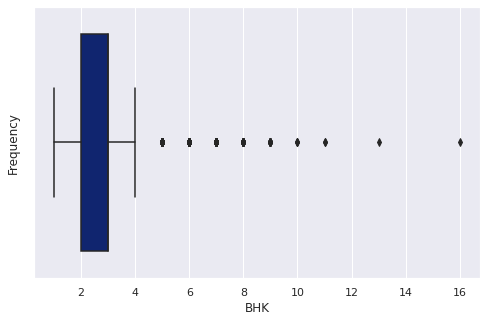

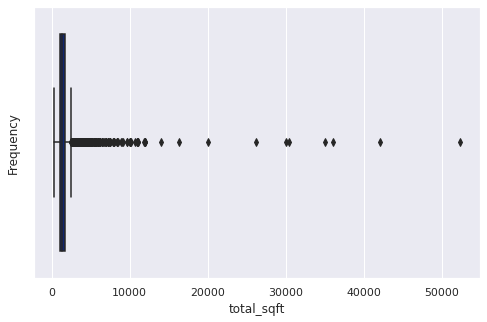

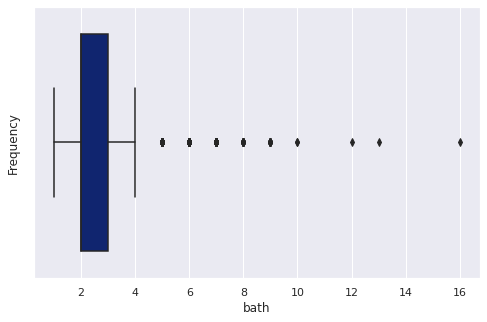

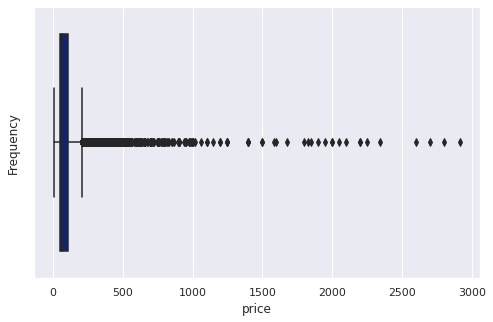

In [37]:
Numerical=dff.select_dtypes(exclude='object').columns.tolist()

import seaborn as sns

for i in Numerical:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(8, 5)})
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(dff[i], palette='dark');

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='BHK', ylabel='price'>

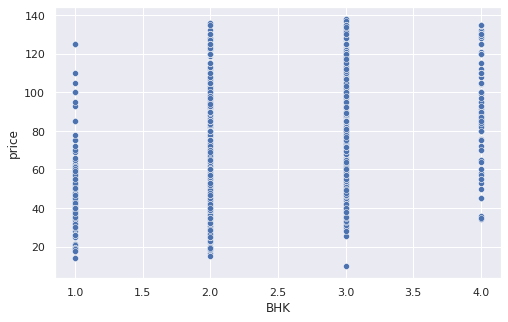

In [38]:
sns.scatterplot(df1.BHK, df1.price)

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='bath', ylabel='price'>

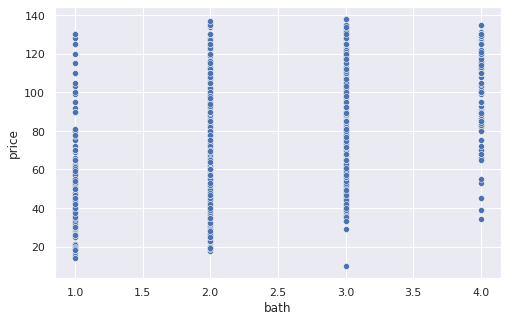

In [39]:
sns.scatterplot(df1.bath, df1.price)

In [40]:
df1.head(4)

,location,BHK,total_sqft,bath,price
0,Electronic City Phase II,2,1056.0,2,39.07
2,Uttarahalli,3,1440.0,2,62.00
3,Lingadheeranahalli,3,1521.0,3,95.00
4,Kothanur,2,1200.0,2,51.00


Text(0, 0.5, 'Count')

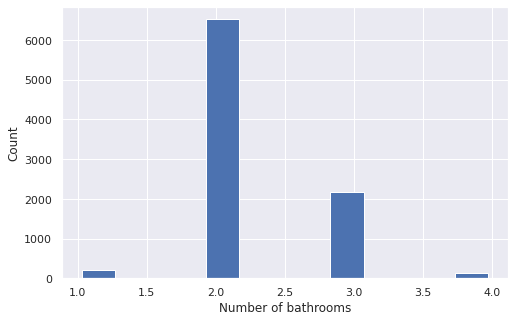

In [41]:
plt.hist(df1.bath,rwidth=0.8)
plt.xlabel("Number of bathrooms")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

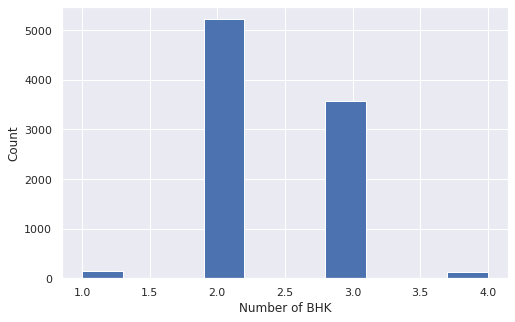

In [42]:
 # No. of BHK count
plt.hist(df1.BHK)
plt.xlabel("Number of BHK")
plt.ylabel("Count")

Text(0, 0.5, 'Count')

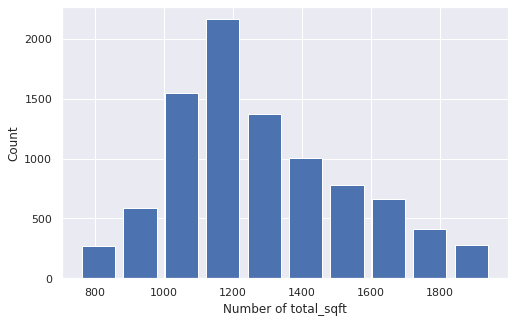

In [43]:
# No. of total_sqft
plt.hist(df1.total_sqft,rwidth=0.8)
plt.xlabel("Number of total_sqft")
plt.ylabel("Count")

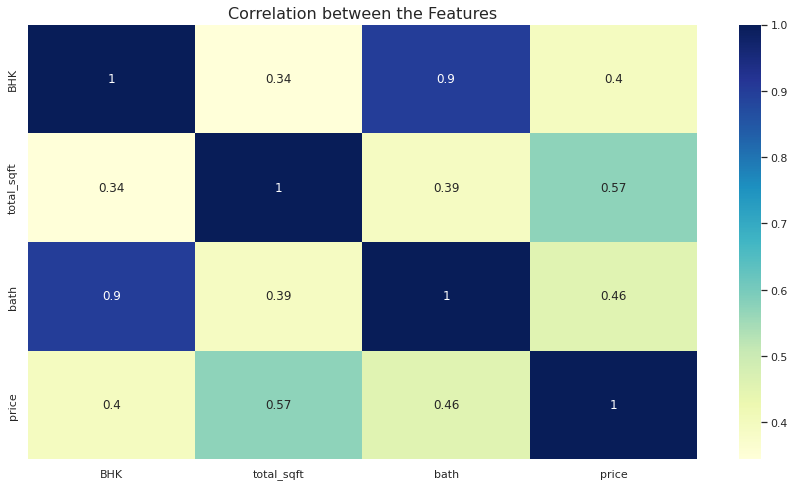

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (15,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu' )
plt.title('Correlation between the Features', size = 16)
plt.show()

In [45]:
df1 = df1.rename(columns={'price':'price_in_lakhs','bath':'bathrooms'})
df1.head()

,location,BHK,total_sqft,bathrooms,price_in_lakhs
0,Electronic City Phase II,2,1056.0,2,39.07
2,Uttarahalli,3,1440.0,2,62.00
3,Lingadheeranahalli,3,1521.0,3,95.00
4,Kothanur,2,1200.0,2,51.00
5,Whitefield,2,1170.0,2,38.00


#### one hot encoding

In [46]:
dummies = pd.get_dummies(df1.location)
dummies.head(4)

,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,Akshaya Nagar,Ambalipura,Ambedkar Nagar,...,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur,others
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [47]:
df1 = pd.concat([df1,dummies.drop('others',axis=1)],axis=1)
df1.head()

,location,BHK,total_sqft,bathrooms,price_in_lakhs,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
0,Electronic City Phase II,2,1056.0,2,39.07,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Uttarahalli,3,1440.0,2,62.00,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,Lingadheeranahalli,3,1521.0,3,95.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Kothanur,2,1200.0,2,51.00,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Whitefield,2,1170.0,2,38.00,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [48]:
df1.isna().sum().sum() , df.isnull().sum().sum()

(0, 0)

In [49]:
X = df1.drop(columns = (['price_in_lakhs','location']), axis=1)
y = df1.price_in_lakhs

In [50]:
# train test split :
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3)

In [51]:
X_train.shape , X_test.shape

((6340, 170), (2718, 170))

In [52]:
X_train.sample(10)

,BHK,total_sqft,bathrooms,1st Phase JP Nagar,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,Abbigere,...,Uttarahalli,Varthur,Vidyaranyapura,Vijayanagar,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yeshwanthpur
890,3,1356.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6007,3,1435.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5599,3,1617.5,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3110,3,1541.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4157,2,1400.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
13149,3,1530.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3270,2,1156.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1238,3,1617.0,3,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
13016,3,1616.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1329,2,1143.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
y_train

5214      38.90
12772     80.00
11339     78.00
7441      57.00
4648     135.00
          ...  
6390      48.00
203       53.00
8447      65.00
1130      55.00
12648     28.13
Name: price_in_lakhs, Length: 6340, dtype: float64

In [54]:
from time import time

from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,ExtraTreesRegressor,VotingRegressor,StackingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import explained_variance_score,mean_absolute_error,r2_score

models = [
    LinearRegression(),
    Ridge(),
    Lasso(),
    DecisionTreeRegressor(),
    RandomForestRegressor()
]


for model in models:
    start = time()
    model.fit(X_train, y_train)
    train_time = time() - start
    start = time()
    y_pred = model.predict(X_test)
    predict_time = time()-start    
    print(model)
    print("\tTraining time: %0.3fs" % train_time)
    print("\tPrediction time: %0.3fs" % predict_time)
    print("\tExplained variance:", explained_variance_score(y_test, y_pred))
    print("\tMean absolute error:", mean_absolute_error(y_test, y_pred))
    print("\tR2 score:", r2_score(y_test, y_pred))
    print()

LinearRegression()
	Training time: 0.078s
	Prediction time: 0.015s
	Explained variance: 0.5422440535458773
	Mean absolute error: 12.610782798939265
	R2 score: 0.5422431653339137

Ridge()
	Training time: 0.042s
	Prediction time: 0.012s
	Explained variance: 0.542582335262028
	Mean absolute error: 12.628574663839116
	R2 score: 0.5425789534865075

Lasso()
	Training time: 0.043s
	Prediction time: 0.013s
	Explained variance: 0.4403353819916157
	Mean absolute error: 14.39065730836711
	R2 score: 0.4403322519466313

DecisionTreeRegressor()
	Training time: 0.189s
	Prediction time: 0.006s
	Explained variance: 0.4131321900817061
	Mean absolute error: 13.099914652256777
	R2 score: 0.41286541119050213

RandomForestRegressor()
	Training time: 6.962s
	Prediction time: 0.125s
	Explained variance: 0.5551206675162275
	Mean absolute error: 11.828548392912774
	R2 score: 0.5549395094828216



In [55]:
# Gradient boosting

from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Split the data into training and test sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a gradient boosting regressor with 100 trees and a learning rate of 0.1
model = GradientBoostingRegressor(n_estimators=450, learning_rate=0.3)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model

print("Mean absolute error: ", mean_absolute_error(y_test, y_pred))
print("R2 score: ", r2_score(y_test, y_pred))

Mean absolute error:  11.656171551034946
R2 score:  0.6003125622308196


In [56]:
# xgboost
xgb = XGBRegressor(n_estimators=45,max_depth=5,learning_rate=0.5)

xgb.fit(X_train,y_train)

y_pred = xgb.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5887826093609401
MAE 11.972513872164852


In [57]:
# voting regressor

rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_features=0.75,max_depth=10)

mod_1 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

mod_1.fit(X_train,y_train)

y_pred = mod_1.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5632500851547747
MAE 12.528378675124376


In [58]:
# stacking

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
    ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
]

mod_2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

mod_2.fit(X_train,y_train)

y_pred = mod_2.predict(X_test)

print('R2 score',r2_score(y_test,y_pred))
print('MAE',mean_absolute_error(y_test,y_pred))

R2 score 0.5674540269219834
MAE 12.431451630372186
